
# 🕒 Handling Datetime

#### 🔎 Why Indexing is Important

Indexing is the **backbone of time series analysis**. In energy informatics, we often deal with **timestamps**:

* ⚡ Smart meter readings (every 15 minutes)
* 🌡️ Weather station logs (hourly/daily)
* 💶 Market prices (day-ahead/hourly)

Having a **DatetimeIndex** allows us to:

* ⏩ **Resample** data (aggregate from 15-min → hourly, daily, monthly)
* 🔎 **Select slices** naturally (`df["2024-01-10"]` or `df["2024-01-01":"2024-01-07"]`)
* 🧩 **Align datasets** (demand with weather, price with production)
* 🚨 Detect **missing timestamps** → ensure data continuity

Without proper indexing, time series handling becomes error-prone and messy.

---


In [11]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import missingno as msno

# Creating a DatetimeIndex

In [12]:


# Hourly demand values for one day
rng = pd.date_range("2024-01-01", periods=24, freq="h")
demand = np.random.randint(500, 800, size=24)

df = pd.DataFrame({"demand_MWh": demand}, index=rng)
print(df.head())

                     demand_MWh
2024-01-01 00:00:00         796
2024-01-01 01:00:00         772
2024-01-01 02:00:00         655
2024-01-01 03:00:00         628
2024-01-01 04:00:00         697


In [13]:
elering = pd.read_csv('data/electricity-production and consumption_2022.csv',  delimiter=';',decimal=',')
elering.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine
0,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4
1,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1
2,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6
3,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9
4,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2


In [14]:
print(elering['Kuupaev (Eesti aeg)'].head())

0    01.01.2022 00:00
1    01.01.2022 01:00
2    01.01.2022 02:00
3    01.01.2022 03:00
4    01.01.2022 04:00
Name: Kuupaev (Eesti aeg), dtype: object


In [15]:
elering['timestamp'] = pd.to_datetime(elering['Kuupaev (Eesti aeg)'], dayfirst=True)
elering.head()

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine,timestamp
0,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4,2022-01-01 00:00:00
1,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1,2022-01-01 01:00:00
2,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6,2022-01-01 02:00:00
3,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9,2022-01-01 03:00:00
4,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2,2022-01-01 04:00:00


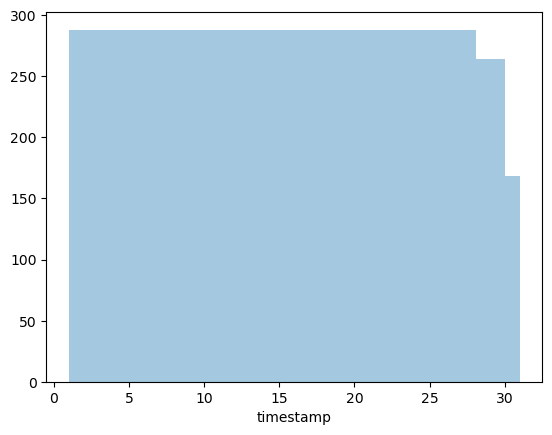

In [16]:
day_of_month = elering['timestamp'].dt.day
sns.distplot(day_of_month, kde=False, bins=31);

In [17]:
elering.set_index('timestamp', inplace=True)

In [18]:
elering

,Ajatempel (UTC),Kuupaev (Eesti aeg),Tarbimine,Tootmine,Planeeritud tarbimine,Planeeritud tootmine
timestamp,,,,,,
2022-01-01 00:00:00,1640988000,01.01.2022 00:00,899.4,419.5,903.1,462.4
2022-01-01 01:00:00,1640991600,01.01.2022 01:00,892.1,431.9,935.8,469.1
2022-01-01 02:00:00,1640995200,01.01.2022 02:00,874.3,428.1,897.6,458.6
2022-01-01 03:00:00,1640998800,01.01.2022 03:00,860.1,435.7,878.5,471.9
2022-01-01 04:00:00,1641002400,01.01.2022 04:00,842.7,429.2,891.1,472.2
...,...,...,...,...,...,...
2022-12-31 19:00:00,1672506000,31.12.2022 19:00,989.4,674.4,983.3,660.0
2022-12-31 20:00:00,1672509600,31.12.2022 20:00,932.5,614.2,957.5,600.3
2022-12-31 21:00:00,1672513200,31.12.2022 21:00,889.5,609.5,921.1,590.6



# ✅ Summary

* A **DatetimeIndex** turns Pandas into a true **time series toolbox**.
* It simplifies **selection, resampling, merging, and gap detection**.
* For **energy data**, datetime indexing is a must for robust preprocessing and forecasting.


# 🕒 Finding Missing Datetime Indices

When working with **time series**, missing data often means that **timestamps are missing** (not just NaN values).


In [19]:
# Full hourly index for 3 days
rng_full = pd.date_range("2024-01-01", periods=72, freq="H")

# Drop some hours to simulate missing timestamps
rng_missing = rng_full.delete([5, 17, 23, 40, 55])

# Create dataset
demand = np.random.randint(500, 800, size=len(rng_missing))
df = pd.DataFrame({"demand": demand}, index=rng_missing)

print("DataFrame index length:", len(df))
print("Expected full length:", len(rng_full))

DataFrame index length: 67
Expected full length: 72


---

### 🔧 ✨ 🔍 Identify missing timestamps

In [20]:
# Reindex to full range
df_full = df.reindex(rng_full)

# Missing indices
missing_times = df_full.index[df_full["demand"].isna()]
print("Missing timestamps:")
print(missing_times)

Missing timestamps:
DatetimeIndex(['2024-01-01 05:00:00', '2024-01-01 17:00:00',
               '2024-01-01 23:00:00', '2024-01-02 16:00:00',
               '2024-01-03 07:00:00'],
              dtype='datetime64[ns]', freq=None)


### 🔧 ✨ 📊 🖼️ Visualizing with `missingno`

You can zoom into just the problematic period.


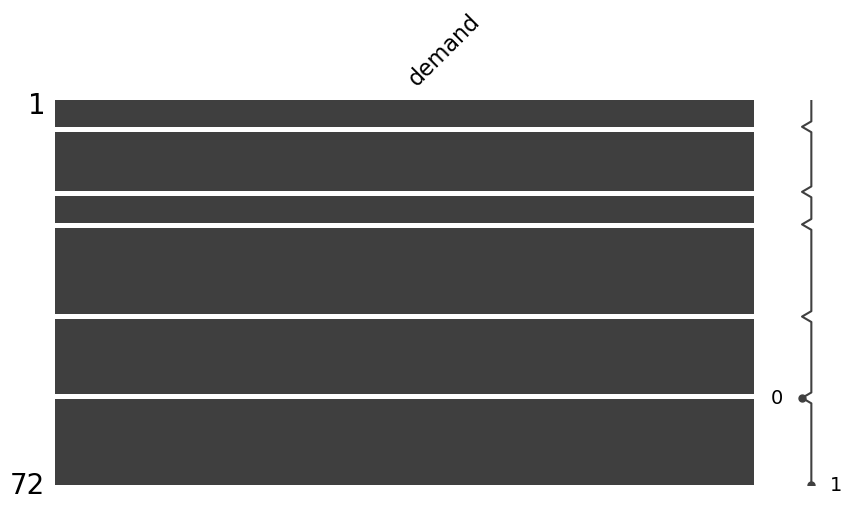

In [21]:
# Restrict to one problematic week/day
week = df_full["2024-01-01":"2024-01-03"]

# Missing matrix for this window
msno.matrix(week,figsize=(10,5))
plt.show()

---

### 🔧 ✨ ✅ Workflow Recap

1. **Define expected frequency** (`pd.date_range`).
2. **Reindex** your DataFrame to this full index.
3. Missing entries show up as `NaN`.
4. Use `.isna()` or `missingno` to visualize gaps.

# Daylight saving time ⏳
Twice a year, like clockwork (literally), we shift time. In spring 🌸, we jump forward an hour. In autumn 🍂, we fall back. While it may seem like a minor inconvenience — an extra hour of sleep in October and one less in March — it’s a major challenge for those working with energy data.

## 🔄 How DST changes patterns
Daylight Saving Time (DST) isn’t just about adjusting our clocks — it changes how we live. When the clocks shift, so do our routines:

🌅 MORNINGS start in different lighting conditions, affecting how much electricity we use for heating and lighting.

🌆 EVENINGS feel longer or shorter, shifting peak energy demand.

Also:

⚡ SOLAR ENERGY PRODUCTION shifts as the timing of sunrise and sunset changes, impacting solar generation.

💡 LIGHT SENSOR-BASED LIGHTING SYSTEMS may not immediately adapt to DST, impacting electricity consumption in both residential and commercial spaces. 

## 📉 The forecasting nightmare
For energy analysts, DST is more than just an inconvenience — it disrupts entire forecasting models:

SPRING FORWARD creates a 23-hour day, meaning an entire hour of data is missing.

FALL BACK results in a 25-hour day, adding an extra hour that doesn't fit neatly into standard models.

Most forecasting methods assume a consistent 24-hour cycle. When that cycle breaks, so does the accuracy of predictions. Models trained on past data might not adjust properly, leading to errors in energy demand forecasts.

## 🛠️ Fixing the problem
So, what can we do to adjust forecasting models for DST? Here are a few potential solutions:

📊 ADJUST DATA WINDOWS DYNAMICALLY: Allow for 23-hour and 25-hour days instead of forcing all days into a 24-hour mold.

🧠 TAGGING DST IN THE DATA: Introduce a DST variable in models and train separate models for DST and standard time periods.

📝 SMOOTHING THE ANOMALIES: Discard the extra hour in autumn and interpolate values in spring to maintain consistency.

🤖 SMARTER MACHINE LEARNING MODELS: Develop adaptive models that detect and adjust for DST shifts automatically.

## 🌍 The bigger picture
DST is more than a technical nuisance — it fundamentally alters how we interact with energy. Forecasting electricity demand isn’t just about time; it’s about people’s habits, work schedules, and our response to natural light. ⏰

As the debate on whether to scrap DST altogether continues, energy professionals need to stay adaptable. Whether through clever data adjustments, smarter machine learning models, or hybrid forecasting techniques, acknowledging DST’s impact is key to maintaining accuracy in energy forecasting.